# CSE 252A Computer Vision I Fall 2019 - Homework 4
## Instructor: Ben Ochoa
### Assignment published on: Tuesday, November 05, 2019
### Due on: Tuesday, November 19, 2019 11:59 pm

## Instructions
* Review the academic integrity and collaboration policies on the course website.
  * This assignment must be completed individually.
* All solutions must be written in this notebook.
  * This includes the theoretical problems, for which you **must** write your answers in Markdown cells (using LaTeX when appropriate).
  * Programming aspects of the assignment must be completed using Python in this notebook.
* If you want to modify the skeleton code, you may do so. It has only been provided as a framework for your solution.
* You may use Python packages (such as NumPy and SciPy) for basic linear algebra, but you may not use packages that directly solve the problem.
  * If you are unsure about using a specific package or function, then ask the instructor and/or teaching assistants for clarification.
* You must submit this notebook exported as a PDF. You must also submit this notebook as `.ipynb` file.
  * Submit both files (`.pdf` and `.ipynb`) on Gradescope.
  * **You must mark the PDF pages associated with each question in Gradescope. If you fail to do so, we may dock points.**
* It is highly recommended that you begin working on this assignment early.
* **Late policy: assignments submitted late will receive a 15% grade reduction for each 12 hours late (i.e., 30% per day). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only) to a due date, you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances.**

## Problem 1: Epipolar Geometry [4 pts]
Consider two cameras whose image planes are the z=1 plane, and whose focal points are at (-12, 0, 0) and (12, 0, 0). We'll call a point in the first camera (x, y), and a point in the second camera (u, v). Points in each camera are relative to the camera center. So, for example if (x, y) = (0, 0), this is really the point (-12, 0, 1) in world coordinates, while if (u, v) = (0, 0) this is the point (12, 0, 1).
![fig1](fig/fig1.png)

a) Suppose the points (x, y) = (8, 7) is matched to the point (u, v) = (2, 7). What is the 3D location of this point?

b) Compute the Essential Matrix.

c) Consider points that lie on the line x + z = 2, y = 0. Use the same stereo set up as before. Write an analytic expression giving the disparity of a point on this line after it projects onto the two images, as a function of its position in the right image. So your expression should only involve the variables u and d (for disparity). Your expression only needs to be valid for points on the line that are in front of the cameras, i.e. with z > 1.

#### Answers:

a) 3D location of point:

- World coordinate of $(x,y)$ and $(u,v)$ are $(-4,7,1)$ and $(14,7,1)$ respectively. 
- Line through focal point 1 & $(x,y,1)_\text{w}$ can be represented by $l_1 = (-12,0,0)+\alpha\times(8,7,1)$.
- Line through focal point 2 & $(u,v,1)_\text{w}$ can be represented by $l_1 = (12,0,0)+\beta\times(2,7,1)$.
- The intersection is when $\alpha = \beta = 4$, thus the 3D location of point is $(20,28,4)$.

b) Essential Matrix (pure  horizontal translation, $R=I$):

$$
E = [t_{\times}]R = \begin{bmatrix}
0&0&0 \\ 
0&0&-24\\
0&24&0
\end{bmatrix}
$$

c) 

![fi](resizeimage.png)

- P in the world coordinate can be expressed by $(x,0,2-x)$, it's projection on right image plane can be written as $$\frac{x-12}{2-x} = u$$From this we rewrite x as a function of u$$x = \frac{2u+12}{u+1}$$the projection of P on left plane then can be written as$$\frac{x+12}{2-x} = \frac{7u+12}{5}$$Thus, disparity $d$ can be calculated$$d = x_{L}-x_{R} = \frac{7u+12}{5}-u= -2.4u-2.4$$

## Problem 2: Epipolar Rectification [4 pts]
In stereo vision, image rectification is a common preprocessing step to simplify the problem of finding
matching points between images. The goal is to warp image views such that the epipolar lines are
horizontal scan lines of the input images. Suppose that we have captured two images $I_A$ and $I_B$ from
identical calibrated cameras separated by a rigid transformation

$_{A}^{B}\textrm{T}= \begin{bmatrix}
\boldsymbol{R} & \boldsymbol{t} \\ 
0^T & 1
\end{bmatrix}$ and $\boldsymbol{t}=[t_x,t_y,t_z]$

Without loss of generality assume that camera A's optical center is positioned at the origin and that its optical axis is in the direction of the z-axis.

From the lecture, a rectifying transform for each image should map the epipole to a point infinitely far away in the horizontal direction $ H_{A}e_{A} = H_{B}e_{B} = [1, 0, 0]^T$. Consider the following special cases:

a) Pure horizontal translation $\boldsymbol{t} = [t_{x}, 0, 0]^T$, $\boldsymbol{R} = \boldsymbol{I}$

b) Pure translation orthogonal to the optical axis $\boldsymbol{t} = [t_{x}, t_{y}, 0]^T$, $\boldsymbol{R} = \boldsymbol{I}$

c) Pure translation along the optical axis $\boldsymbol{t} = [0, 0, t_{z}]^T$, $\boldsymbol{R} = \boldsymbol{I}$

d) Pure rotation $\boldsymbol{t} = [0, 0, 0]^T$, $\boldsymbol{R}$ is an arbitrary rotation matrix

For each of these cases, determine whether or not epipolar rectification is possible. Include the following information for each case:

(i) The epipoles $e_A$ and $e_B$

(ii) The equation of the epipolar line $l_B$ in $I_B$ corresponding to the point $[x_A, y_A, 1]^T$ in $I_A$ (if one exists)

(iii) A plausible solution to the rectifying transforms $H_A$ and $H_B$ (if one exists) that attempts to minimize distortion (is as close as possible to a 2D rigid transformation). Note that the above 4 cases are special cases; a simple solution should become apparent by looking at the epipolar lines.

One or more of the above rigid transformations may be a degenerate case where rectification is not
possible or epipolar geometry does not apply. If so, explain why.

#### Answers:

a) Pure horizontal translation $\boldsymbol{t} = [t_{x}, 0, 0]^T$, $\boldsymbol{R} = \boldsymbol{I}$

$$
E = [t_{\times}]R = \begin{bmatrix}
0&0&0 \\ 
0&0&-t_{x}\\
0&t_{x}&0
\end{bmatrix}
$$

- The epipoles $e_A$ and $e_B$.

    $Ee_{A}=0 \rightarrow e_{A}=[1,0,0]^{T}$
    
    $E^{T}e_{B}=0 \rightarrow e_{B} = [1,0,0]^{T}$



- The equation of the epipolar line $l_B$ in $I_B$ corresponding to point $[x_A,y_A,1]^T$ in $I_A$ (if exists).

    $l_{B}=Ep_{A} =\begin{bmatrix}
                0&0&0 \\ 
                0&0&-t_{x}\\
                0&t_{x}&0
                \end{bmatrix}\begin{bmatrix}
                x_{A} \\ 
                y_{A}\\
                1
                \end{bmatrix} = \begin{bmatrix}
                0 \\ 
                -t_{x}\\
                t_{x}y_{A}
                \end{bmatrix}$ 


- A plausible solution to the rectifying transforms $H_A$ and $H_B$ (if exists) that attempts to minimize distortion.

    To do rectification, we want to map epipole on the horizontal axis at some point $[f,0,1]^{T}$ which is already the case, thus, $H_{A}=H_{B}=I$


b) Pure translation orthogonal to the optical axis $\boldsymbol{t} = [t_{x}, t_{y}, 0]^T$, $\boldsymbol{R} = \boldsymbol{I}$
$\boldsymbol{R} = \boldsymbol{I}$

$$
E = [t_{\times}]R = \begin{bmatrix}
0&0&t_{y} \\ 
0&0&-t_{x}\\
-t_{y}&t_{x}&0
\end{bmatrix}
$$

- The epipoles $e_A$ and $e_B$.

    $Ee_{A}=0 \rightarrow e_{A}=[t_{x},t_{y},0]^{T}$
    
    $E^{T}e_{B}=0 \rightarrow e_{B} = [t_{x},t_{y},0]^{T}$


- The equation of the epipolar line $l_B$ in $I_B$ corresponding to point $[x_A,y_A,1]^T$ in $I_A$ (if exists).

    $l_{B}=Ep_{A} =\begin{bmatrix}
                0&0&t_{y} \\ 
                0&0&-t_{x}\\
                -t_{y}&t_{x}&0
                \end{bmatrix}\begin{bmatrix}
                x_{A} \\ 
                y_{A}\\
                1
                \end{bmatrix} = \begin{bmatrix}
                t_{y} \\ 
                -t_{x}\\
                -t_{y}x_{A}+t_{x}y_{A}
                \end{bmatrix}$ 


- A plausible solution to the rectifying transforms $H_A$ and $H_B$ (if exists) that attempts to minimize distortion.

    To map epipole to $[1,0,0]^{T}$, $H_{A} = H_{B} = \begin{bmatrix}
\alpha\frac{t_{x}}{t_{x}^{2}+t_{y}^{2}}&\alpha\frac{t_{y}}{t_{x}^{2}+t_{y}^{2}}&0\\ 
-\alpha t_{y}&\alpha t_{x}&0\\
0&0&1
\end{bmatrix}$, where $\alpha = 1$ if $t_{x}\geq0$ and $\alpha = -1$ otherwise.

c) Pure translation along the optical axis $\boldsymbol{t} = [0, 0, t_{z}]^T$, $\boldsymbol{R} = \boldsymbol{I}$
$\boldsymbol{R} = \boldsymbol{I}$

$$
E = [t_{\times}]R = \begin{bmatrix}
0&-t_{z}&0 \\ 
t_{z}&0&0\\
0&0&0
\end{bmatrix}
$$

- The epipoles $e_A$ and $e_B$.

    $Ee_{A}=0 \rightarrow e_{A}=[0,0,1]^{T}$
    
    $E^{T}e_{B}=0 \rightarrow e_{B} = [0,0,1]^{T}$


- The equation of the epipolar line $l_B$ in $I_B$ corresponding to point $[x_A,y_A,1]^T$ in $I_A$ (if exists).

    $l_{B}=Ep_{A} =\begin{bmatrix}
                0&-t_{z}&0 \\ 
                t_{z}&0&0\\
                0&0&0
                \end{bmatrix}\begin{bmatrix}
                x_{A} \\ 
                y_{A}\\
                1
                \end{bmatrix} = \begin{bmatrix}
                -t_{z}y_{A} \\ 
                t_{z}x_{A}\\
                0
                \end{bmatrix}$ 


- A plausible solution to the rectifying transforms $H_A$ and $H_B$ (if exists) that attempts to minimize distortion.

    To do rectification, we want to map epipole on the horizontal axis at some point $[f,0,1]^{T}$ which is already the case, thus, $H_{A}=H_{B}=I$

d) Pure rotation $\boldsymbol{t} = [0, 0, 0]^T$, $\boldsymbol{R}$ is an arbitrary rotation matrix
$\boldsymbol{R} = \boldsymbol{I}$

$$
E = [t_{\times}]R = \begin{bmatrix}
0&0&0 \\ 
0&0&0\\
0&0&0
\end{bmatrix}
$$

- The epipoles $e_A$ and $e_B$.

    $Ee_{A}=0 \rightarrow e_{A} \text{ can be any arbitrary homogeneous point}$
    
    $E^{T}e_{B}=0 \rightarrow e_{B} \text{ can be any arbitrary homogeneous point}$


- The equation of the epipolar line $l_B$ in $I_B$ corresponding to point $[x_A,y_A,1]^T$ in $I_A$ (if exists).

    $l_{B}=Ep_{A} = 0$ which means such line can not be constructed. 


- A plausible solution to the rectifying transforms $H_A$ and $H_B$ (if exists) that attempts to minimize distortion.

    As $e_{A}$ and $e_{B}$ are undefined, rectification can not be performed.

## Problem 3: Sparse Stereo Matching [32 pts]

In this problem we will play around with sparse stereo matching methods. You will work on two image pairs, a warrior figure and a figure from the Matrix movies. These files both contain two images, two camera matrices, and two sets of corresponding points (extracted by manually clicking the images). For illustration, I have run my code on a third image pair (dino1.png, dino2.png). This data is also provided for you to debug your code, but **you should only report results on warrior and matrix**. In other words, where I include one (or a pair) of images in the assignment below, you will provide the same thing but for BOTH matrix and warrior. Note that the matrix image pair is harder, in the sense that the matching algorithms we are implementing will not work quite as well. You should expect good results, however, on warrior.

### Corner Detection [8 pts]
The first thing we need to do is to build a corner detector. This should be done according to http://cseweb.ucsd.edu/classes/fa19/cse252A-a/lec7.pdf. You should fill in the function <code>corner_detect</code> below, and take as input <code>corner_detect(image, nCorners, smoothSTD, windowSize)</code> where smoothSTD is the standard deviation of the smoothing kernel and windowSize is the window size for corner detector and non maximum suppression. In the lecture the corner detector was implemented using a hard threshold. Do not do that but instead return the nCorners strongest corners after non-maximum suppression. This way you can control exactly how many corners are returned. Run your code on all four images (with nCorners = 20) and show outputs as shown below. You may find scipy.ndimage.filters.gaussian_filter easy to use for smoothing. In this problem, try the following different standard deviation ($\sigma$) parameters for the Gausian smoothing kernel: 0.5, 1, 2 and 4. For a particular $\sigma$, you should take the kernel size to be $6\times\sigma$ (add $1$ if the kernel size is even). So for example if $\sigma=2$, corner detection kernel size should be $13$. This should be followed throughtout all experiments in this assignment.

There will be a total of 16 images as outputs : (4 choices of smoothSTD x 2 matrix imgs x 2 warrior imgs). 


![dinoCorner1](fig/dinoCorner1.png)
![dinoCorner2](fig/dinoCorner2.png)

Comment on your results and observations (3/8 points). You don't need to comment per output, just **discuss** any trends you see for the detected corners as you change the windowSize and increase the smoothing w.r.t the two pair of images warrior and matrix. Also discuss if you are able to find corresponding corners for same pair of images. 

In [1]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import imageio
import copy
from scipy.signal import convolve

In [3]:
def rgb2gray(rgb):
    """ Convert rgb image to grayscale.
    """
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [4]:
def gradient(image):
    """ ==========
    Compute gradient of the image
    ========== """
    g_mag = np.zeros_like(image)
    g_theta = np.zeros_like(image)
    x_dir = np.array([-1/2, 0, 1/2]).reshape((1,3))
    y_dir = np.array([-1/2, 0, 1/2]).reshape((3,1))
    dx = convolve(image,x_dir,mode="same")
    dy = convolve(image,y_dir,mode="same")
    return dx,dy

In [5]:
def get_lambda(img,cx,cy,cxy,window_range):
    """ ==========
    Compute the min eigenvalues of given image
    ========== """
    lambda_mat = np.zeros(img.shape)
    c_x,c_y,c_xy = np.zeros(cx.shape),np.zeros(cy.shape),np.zeros(cxy.shape)
    row,col = img.shape
    for i in range(window_range,row-window_range):
        for j in range(window_range,col-window_range):
            i_start = i-window_range
            i_end = i+window_range+1
            j_start = j-window_range
            j_end = j+window_range+1
            c_x[i,j] = cx[i_start:i_end,j_start:j_end].sum()
            c_y[i,j] = cy[i_start:i_end,j_start:j_end].sum()
            c_xy[i,j] = cxy[i_start:i_end,j_start:j_end].sum()
            c_mat = np.array([[c_x[i,j],c_xy[i,j]],[c_xy[i,j],c_y[i,j]]])
            a,_ = np.linalg.eig(c_mat)
            lambda_mat[i-window_range,j-window_range] = min(a)
    return lambda_mat

In [6]:
def nms(mat,window_size):
    """ ==========
    Discreted non-maximum suppression
    ========== """
    rows,cols = mat.shape
    image = np.zeros((rows,cols))
    window_range = window_size//2
    for i in range(window_range,rows-window_range):
        for j in range(window_range,cols-window_range):
            i_start = i-window_range
            i_end = i+window_range+1
            j_start = j-window_range
            j_end = j+window_range+1
            window = mat[i_start:i_end,j_start:j_end]
            max_value = window.max(axis=(0,1))
            if max_value != mat[i,j]:
                image[i,j] = 0
            else:
                image[i,j] = max_value
    return image

In [7]:
def n_strongest(img, n):
    """ ==========
    Find nth strongest corners
    ========== """    
    uniques = np.unique(img)
    threshold = uniques[-n-1]
    return np.where(img > threshold)

In [8]:
def corner_detect(image, nCorners, smoothSTD, windowSize):
    """Detect corners on a given image.

    Args:
        image: Given a grayscale image on which to detect corners.
        nCorners: Total number of corners to be extracted.
        smoothSTD: Standard deviation of the Gaussian smoothing kernel.
        windowSize: Window size for corner detector and non maximum suppression.

    Returns:
        Detected corners (in image coordinate) in a numpy array (n*2).

    """
    
    """
    Put your awesome numpy powered code here:
    """
    corners = np.zeros((nCorners, 2))
    window_range = windowSize//2
    filtered_img = gaussian_filter(image,smoothSTD)
    padded_org_img = np.pad(filtered_img,window_range,mode="symmetric")
    pad_dx,pad_dy = gradient(padded_org_img)
    pad11,pad22,pad12 = pad_dx**2,pad_dy**2,pad_dx*pad_dy
    lambda_mat = get_lambda(filtered_img,pad11,pad22,pad12,window_range)
    n_corner = n_strongest(nms(lambda_mat,windowSize),nCorners)
    corners = np.array(list(zip(n_corner[1],n_corner[0])))
    return corners

In [9]:
def show_corners_result(imgs, corners):
    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(221)
    ax1.imshow(imgs[0], cmap='gray')
    ax1.scatter(corners[0][:, 0], corners[0][:, 1], s=36, edgecolors='r', facecolors='none')

    ax2 = fig.add_subplot(222)
    ax2.imshow(imgs[1], cmap='gray')
    ax2.scatter(corners[1][:, 0], corners[1][:, 1], s=36, edgecolors='r', facecolors='none')
    plt.show()

SmoothSTD: 0.5 WindowSize: 3


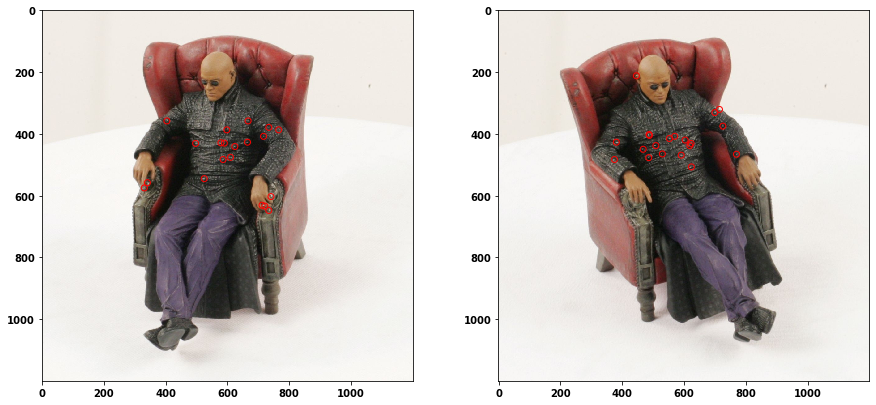

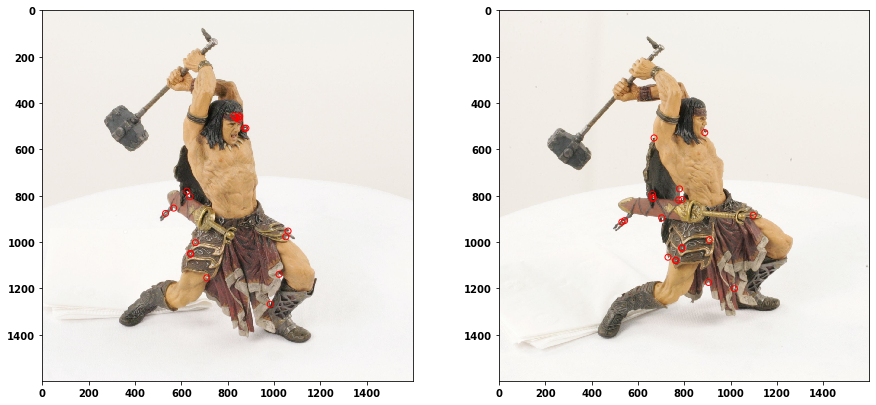

SmoothSTD: 1 WindowSize: 7


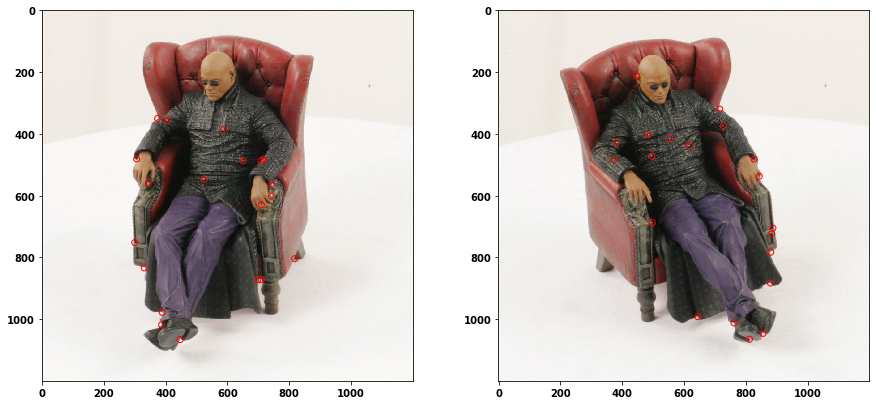

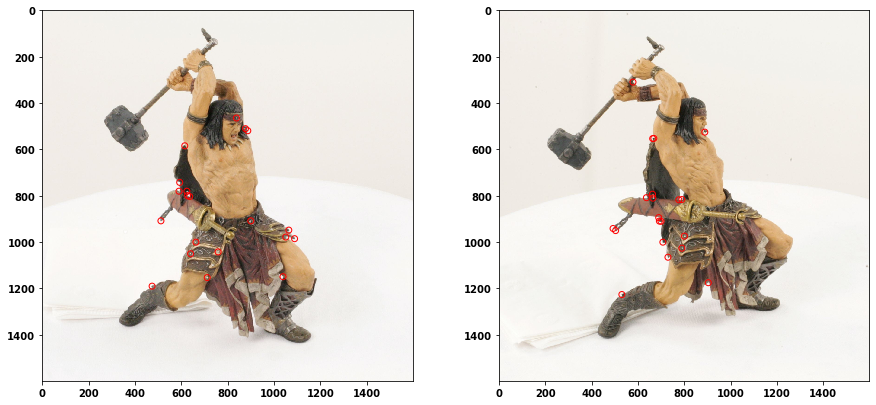

SmoothSTD: 2 WindowSize: 13


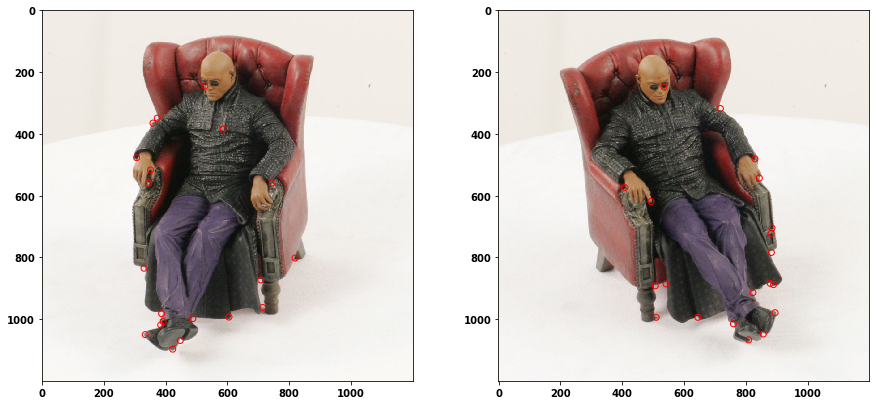

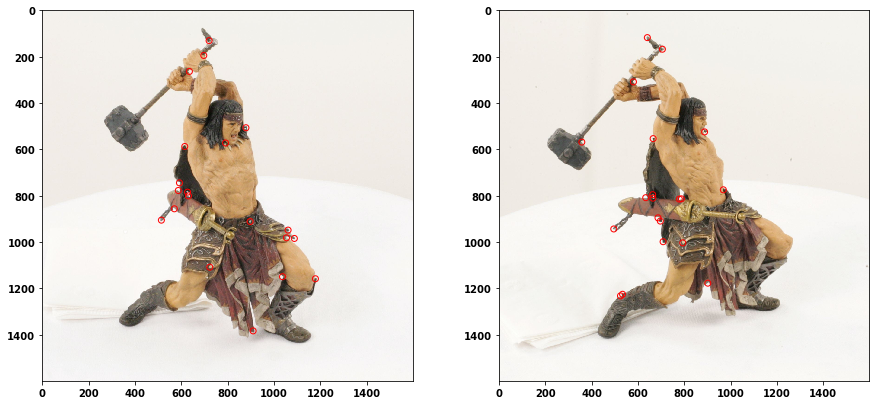

SmoothSTD: 4 WindowSize: 25


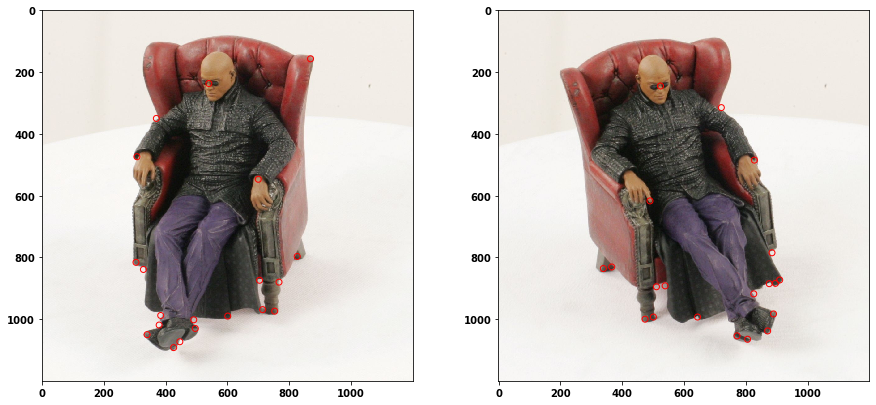

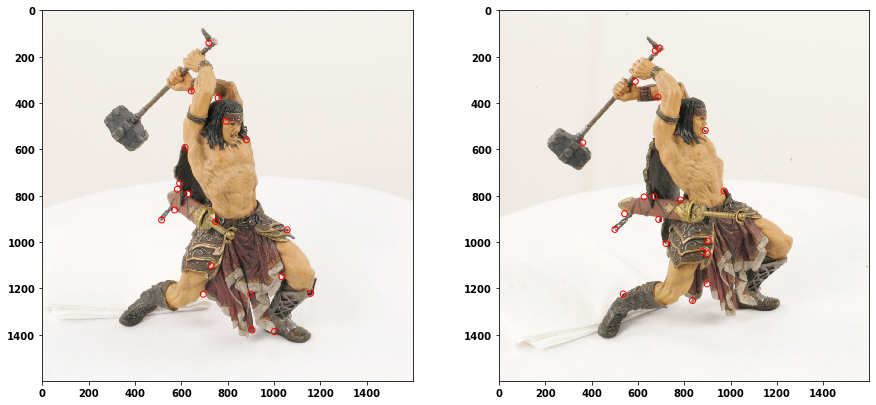

In [10]:
# detect corners on warrior and matrix image sets
# adjust your corner detection parameters here
nCorners = 20
smoothSTDs = [0.5, 1, 2, 4]
imgs_mat = []
imgs_war = []
grayimgs_mat = []
grayimgs_war = []
# Read the two images and convert it to Greyscale
for i in range(2):
    img_mat = imageio.imread('p4/matrix/matrix' + str(i) + '.png')
    imgs_mat.append(img_mat) 
    grayimgs_mat.append(rgb2gray(img_mat))
    # Comment above line and uncomment below line to
    # downsize your image in case corner_detect runs slow in test 
    # grayimgs_mat.append(rgb2gray(img_mat)[::2, ::2])
    # if you unleash the power of numpy you wouldn't need to downsize, it'll be fast
    img_war = imageio.imread('p4/warrior/warrior' + str(i) + '.png')
    imgs_war.append(img_war)
    grayimgs_war.append(rgb2gray(img_war))
    
for smoothSTD in smoothSTDs:
    windowSize = int(6*smoothSTD)
    if windowSize%2==0: windowSize += 1
    crns_mat = []
    crns_war = []
    print ("SmoothSTD:", smoothSTD, "WindowSize:", windowSize)
    for i in range(2):
        crns_mat.append(corner_detect(grayimgs_mat[i], nCorners, smoothSTD,\
                                      windowSize))
        crns_war.append(corner_detect(grayimgs_war[i], nCorners, smoothSTD,\
                                      windowSize))
    show_corners_result(imgs_mat, crns_mat) #uncomment this to show your output!
    show_corners_result(imgs_war, crns_war)

#### Results and observation:

- For small sigma (0.5) with small window size (3), corners tend to appears on the jacket for matrix.png. For warrior.png them most corners are on the head and clothes which is not ideal corners for matching. There are few like 1-3 matches for matrix.png and 2-4 matches for warrior.png

- For sigma = 1, window size = 7, corner detection performs better compared with first trial. we found some corners around chair for matrix.png. For warrior.png, there are still few corners shows on the head but some corners on the sword are detected. There are more corner matches than first trial.

- For sigma = 2, window size = 13, corner detection stops to focus on the jacket of the man and clearly labeled corners around chair and the edge of the person, although it detected 1-2 corners on the cloth and face of the man. For warrior.png, apparently results are better it is able to find the corner of the hammer which is not found before. Moreover, for both images, matrix and warrior, more matched pairs can be found.

- For sigma = 4, window size = 25, no more corner detected on the person's cloth, there are only few unmatched corners compared with our first trial with small sigma. For warrior.png the corners for sword and hammer are found, the corners tend to be found around the bottom part of the body. This might because the cloth that warrior wear folded a lot and can be seems as corner when window size is bigger.

- To sum up, it seems that sigma around 2-4 tends to give a better results and small window size is bad if the image is large.

### NCC (Normalized Cross-Correlation) Matching [2 pts]

Write a function <code>ncc_match</code> that implements the NCC matching algorithm for two input windows.
NCC = $\sum_{i,j}\tilde{W_1} (i,j)\cdot \tilde{W_2} (i,j)$ where $\tilde{W} = \frac{W - \overline{W}}{\sqrt{\sum_{k,l}(W(k,l) - \overline{W})^2}}$ is a mean-shifted and normalized version of the window and $\overline{W}$ is the mean pixel value in the window W.

In [11]:
def ncc_match(img1, img2, c1, c2, R):
    """Compute NCC given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        c1: Center (in image coordinate) of the window in image 1.
        c2: Center (in image coordinate) of the window in image 2.
        R: R is the radius of the patch, 2 * R + 1 is the window size

    Returns:
        NCC matching score for two input windows.

    """
    matching_score = 0
    row,col = img1.shape
    window_size = 2*R+1
    w1 = img1[c1[1]-R:c1[1]+R+1,c1[0]-R:c1[0]+R+1]
    w2 = img2[c2[1]-R:c2[1]+R+1,c2[0]-R:c2[0]+R+1]
    w1_tail = (w1-w1.mean())/np.std(w1,ddof=window_size**2-1)
    w2_tail = (w2-w2.mean())/np.std(w2,ddof=window_size**2-1)
    matching_score = (w1_tail*w2_tail).sum()
    return matching_score

In [12]:
# test NCC match
img1 = np.array([[1, 2, 3, 4], [4, 5, 6, 8], [7, 8, 9, 4]])
img2 = np.array([[1, 2, 1, 3], [6, 5, 4, 4], [9, 8, 7, 3]])
print (ncc_match(img1, img2, np.array([1, 1]), np.array([1, 1]), 1))
# should print 0.8546
print (ncc_match(img1, img2, np.array([2, 1]), np.array([2, 1]), 1))
# should print 0.8457
print (ncc_match(img1, img2, np.array([1, 1]), np.array([2, 1]), 1))
# should print 0.6258

0.8546547739343037
0.8457615282174419
0.6258689611426174


### Naive Matching [4 pts]

Equipped with the corner detector and the NCC matching function, we are ready to start finding correspondances. One naive strategy is to try and find the best match between the two sets of corner points. Write a script that does this, namely, for each corner in image1, find the best match from the detected corners in image2 (or, if the NCC match score is too low, then return no match for that point). You will have to figure out a good threshold (NCCth) value by experimentation. Write a function <code>naive_matching</code> and call it as below. Examine your results for 10, 20, and 30 detected corners in each image. Choose number of detected corners to maximize the number of correct matching pairs. <code>naive_matching</code> will call your NCC matching code. 
**Properly label or mention which output corresponds to which choice of number of corners. Total number of output is 6 images** (3 choice of number of corners for each matrix and warrior), where one image is like below:


Number of Corners: 10
<img src = "fig/dinoMatch.png" alt="dino match" width="800"/>

In [13]:
def naive_matching(img1, img2, corners1, corners2, R, NCCth):
    """Compute NCC given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Corners in image 1 (nx2)
        corners2: Corners in image 2 (nx2)
        R: NCC matching radius
        NCCth: NCC matching score threshold

    Returns:
        NCC matching result a list of tuple (c1, c2), 
        c1 is the 1x2 corner location in image 1, 
        c2 is the 1x2 corner location in image 2. 

    """
    matching = []
    
    mask = np.ones([corners1.shape[0], corners2.shape[0]])
    ncc = np.zeros([corners1.shape[0], corners2.shape[0]])
    
    for i in range(corners1.shape[0]):
        for j in range(corners2.shape[0]):
            ncc[i][j] = ncc_match(img1,img2,corners1[i],corners2[j],R)    
    
    max_value = 1
    
    while max_value >= NCCth:
        masked_cc = mask*ncc
        masked_max = masked_cc.max()
        max_row_idx = masked_cc.argmax()//mask.shape[1]
        max_col_idx = masked_cc.argmax()%mask.shape[1]
        masked_cc[max_row_idx,max_col_idx] = -1
        next_best = max(masked_cc[max_row_idx,:].max(),masked_cc[:,max_col_idx].max())
        masked_cc[max_row_idx,max_col_idx] = masked_max
        if (1-masked_max) < (1-next_best)*0.8:
            matching.append((corners1[max_row_idx],corners2[max_col_idx]))
            mask[max_row_idx,:] = 0
            mask[:,max_col_idx] = 0
        else:
            mask[max_row_idx,max_col_idx] = 0
        max_value = (mask*ncc).max()

    return matching

In [14]:
# You are free to modify code here, create your helper functions etc.
# detect corners on warrior and matrix sets
# Do this for 10, 20 and 30 corners
# read images and detect corners on images
def matching_corners(nCorners):
    smoothSTD = 2
    windowSize = 13
    imgs_mat = []
    crns_mat = []
    imgs_war = []
    crns_war = []
    for i in range(2):
        img_mat = imageio.imread('p4/matrix/matrix' + str(i) + '.png')
        imgs_mat.append(rgb2gray(img_mat))
        # downsize your image in case corner_detect runs slow in test
        # imgs_mat.append(rgb2gray(img_mat)[::2, ::2])
        crns_mat.append(corner_detect(imgs_mat[i], nCorners, smoothSTD, windowSize))

        img_war = imageio.imread('p4/warrior/warrior' + str(i) + '.png')
        imgs_war.append(rgb2gray(img_war))
        # imgs_war.append(rgb2gray(img_war)[::2, ::2])
        crns_war.append(corner_detect(imgs_war[i], nCorners, smoothSTD, windowSize))
    return imgs_mat,crns_mat,imgs_war,crns_war

In [15]:
# plot matching result
def show_matching_result(img1, img2, matching):
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(np.hstack((img1, img2)), cmap='gray') # two dino images are of different sizes, resize one before use
    for p1, p2 in matching:
        plt.scatter(p1[0], p1[1], s=35, edgecolors='r', facecolors='none')
        plt.scatter(p2[0] + img1.shape[1], p2[1], s=35, edgecolors='r', facecolors='none')
        plt.plot([p1[0], p2[0] + img1.shape[1]], [p1[1], p2[1]])
    plt.savefig('dino_matching.png')
    plt.show()

Number of Corners: 10


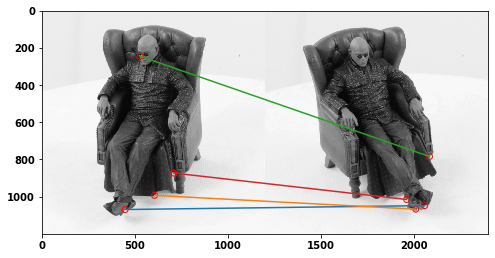

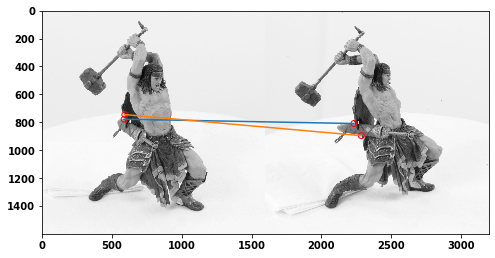

In [16]:
# match corners
R = 15
NCCth = 0.7 # Put your threshold
nCorners = 10
imgs_mat,crns_mat,imgs_war,crns_war = matching_corners(nCorners)
matching_mat = naive_matching(imgs_mat[0]/255, imgs_mat[1]/255, crns_mat[0], crns_mat[1], R, NCCth)
matching_war = naive_matching(imgs_war[0]/255, imgs_war[1]/255, crns_war[0], crns_war[1], R, NCCth)
print("Number of Corners:", nCorners)
show_matching_result(imgs_mat[0], imgs_mat[1], matching_mat)
show_matching_result(imgs_war[0], imgs_war[1], matching_war)

Number of Corners: 20


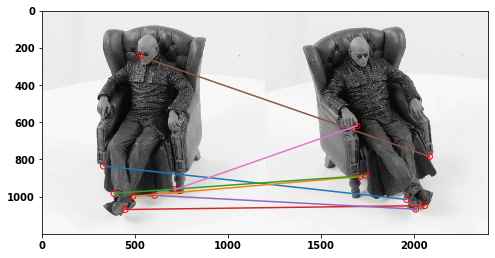

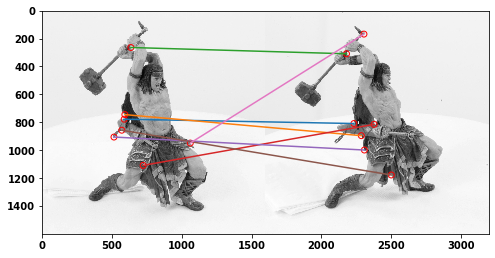

In [17]:
nCorners = 20
imgs_mat,crns_mat,imgs_war,crns_war = matching_corners(nCorners)
matching_mat = naive_matching(imgs_mat[0]/255, imgs_mat[1]/255, crns_mat[0], crns_mat[1], R, NCCth)
matching_war = naive_matching(imgs_war[0]/255, imgs_war[1]/255, crns_war[0], crns_war[1], R, NCCth)
print("Number of Corners:", nCorners)
show_matching_result(imgs_mat[0], imgs_mat[1], matching_mat)
show_matching_result(imgs_war[0], imgs_war[1], matching_war)

Number of Corners: 30


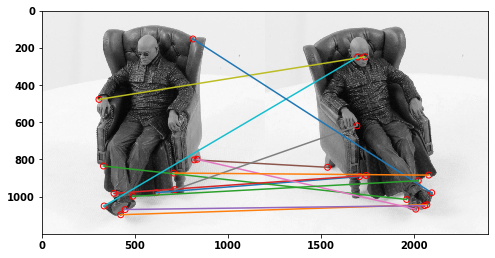

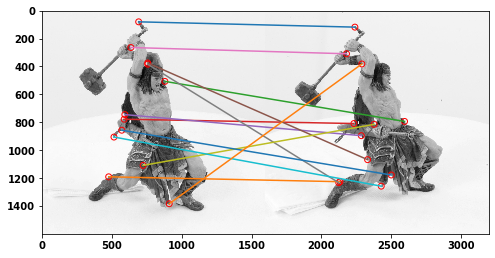

In [18]:
nCorners = 30
imgs_mat,crns_mat,imgs_war,crns_war = matching_corners(nCorners)
matching_mat = naive_matching(imgs_mat[0]/255, imgs_mat[1]/255, crns_mat[0], crns_mat[1], R, NCCth)
matching_war = naive_matching(imgs_war[0]/255, imgs_war[1]/255, crns_war[0], crns_war[1], R, NCCth)
print("Number of Corners:", nCorners)
show_matching_result(imgs_mat[0], imgs_mat[1], matching_mat)
show_matching_result(imgs_war[0], imgs_war[1], matching_war)

### Epipolar Geometry [4 pts]

Complete the <code>compute_fundamental</code> function below using 8 point algorithm described in [Lecture 8](http://cseweb.ucsd.edu/classes/fa19/cse252A-a/lec8.pdf). Using the <code>fundamental_matrix</code> function and the corresponding points provided in cor1.npy and cor2.npy, calculate the fundamental matrix for the set of matrix and warrior image. Note that the normalization of the corner point is handled in the <code>fundamental_matrix</code> function.

In [3]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt
from scipy.io import loadmat

def compute_fundamental(x1,x2):
    """    Computes the fundamental matrix from corresponding points 
        (x1,x2 3*n arrays) using the 8 point algorithm.
        Each row in the A matrix below is constructed as
        [x'*x, x'*y, x', y'*x, y'*y, y', x, y, 1] 

        Returns:
        Fundamental Matrix (3x3)

    """
    
    n = x1.shape[1]
    if x2.shape[1] != n:
        raise ValueError("Number of points don't match.")
        
    A = np.zeros((n,9))
    A = (np.tile(x1,(3,1)) * x2.repeat(3,0)).T
    
    U_a,S_a,V_a = np.linalg.svd(A)
    f = V_a[-1].reshape(3,3)
    
    U_f,S_f,V_f = np.linalg.svd(f)
    S_f[2] = 0
    
    F = U_f@np.diag(S_f)@V_f
    return F
    
def fundamental_matrix(x1,x2):
    # Normalization of the corner points is handled here
    n = x1.shape[1]
    if x2.shape[1] != n:
        raise ValueError("Number of points don't match.")

    # normalize image coordinates
    x1 = x1 / x1[2]
    mean_1 = np.mean(x1[:2],axis=1)
    S1 = np.sqrt(2) / np.std(x1[:2])
    T1 = np.array([[S1,0,-S1*mean_1[0]],[0,S1,-S1*mean_1[1]],[0,0,1]])
    x1 = np.dot(T1,x1)
    
    x2 = x2 / x2[2]
    mean_2 = np.mean(x2[:2],axis=1)
    S2 = np.sqrt(2) / np.std(x2[:2])
    T2 = np.array([[S2,0,-S2*mean_2[0]],[0,S2,-S2*mean_2[1]],[0,0,1]])
    x2 = np.dot(T2,x2)

    # compute F with the normalized coordinates
    F = compute_fundamental(x1,x2)

    # reverse normalization
    F = np.dot(T1.T,np.dot(F,T2))

    return F/F[2,2]

In [5]:
imgids = ["matrix", "warrior"]
for imgid in imgids:
    I1 = imageio.imread("./p4/"+imgid+"/"+imgid+"0.png")
    I2 = imageio.imread("./p4/"+imgid+"/"+imgid+"1.png")
    cor1 = np.load("./p4/"+imgid+"/cor1.npy")
    cor2 = np.load("./p4/"+imgid+"/cor2.npy")
    print("Fundamental Matrix for "+imgid+":")
    print(fundamental_matrix(cor1,cor2))

Fundamental Matrix for matrix:
[[-1.60483389e-07 -1.06948495e-07 -5.84655019e-04]
 [-1.60436874e-06 -4.07287627e-07 -5.61172727e-03]
 [-3.74801155e-04  6.46605756e-03  1.00000000e+00]]
Fundamental Matrix for warrior:
[[ 1.21385527e-06 -3.91206758e-06  5.33108995e-03]
 [ 5.67363618e-06  5.72045293e-07  8.23915769e-03]
 [-5.94520920e-03 -1.14913084e-02  1.00000000e+00]]


### Plot Epipolar Lines [5 pts]
Using this fundamental matrix, plot the epipolar lines in both image pairs across all images. For this part you may want to complete the function <code>plot_epipolar_lines</code>. Shown your result for matrix and warrior as the figure below. 

![Dino Epipolar](fig/dinoEpi1.png)
![Dino Epipolar](fig/dinoEpi2.png)

Also, write the script to calculate the epipoles for a given Fundamental matrix and corner point correspondences in the two images.

In [20]:
def compute_epipole(F):
    '''
    This function computes the epipoles for a given fundamental matrix 
    and corner point correspondences
    input:
    F--> Fundamental matrixh
    output:
    e1--> corresponding epipole in image 1
    e2--> epipole in image2
    '''
    #your code here
    
    _,_,a = np.linalg.svd(F)
    _,_,b = np.linalg.svd(F.T)
    
    e1 = a.T[:,-1]
    e2 = b.T[:,-1]
    return e1/e1[2],e2/e2[2]

def plot_epipolar_lines(img1,img2, cor1, cor2):
    """Plot epipolar lines on image given image, corners

    Args:
        img1: Image 1.
        img2: Image 2.
        cor1: Corners in homogeneous image coordinate in image 1 (3xn)
        cor2: Corners in homogeneous image coordinate in image 2 (3xn)

    """
    F = fundamental_matrix(cor1,cor2)
    e1,e2 = compute_epipole(F)
    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(221)
    ax1.imshow(img1, cmap='gray')
    ax1.scatter(cor1[0,:], cor1[1,:], s=36, edgecolors='b', facecolors='b')
    for i in range(cor1.shape[1]):
        x1 = img1.shape[1]
        slope1 = (e1[1]-cor1[1,i])/(e1[0]-cor1[0,i])
        y1_intercept = cor1[1,i]-slope1*cor1[0,i]
        x1_intercept = slope1*x1+y1_intercept
        ax1.plot([0,x1],[y1_intercept,x1_intercept], color = 'b')
        ax1.axis([0,img1.shape[1],img1.shape[0],0])

    ax2 = fig.add_subplot(222)
    ax2.imshow(img2, cmap='gray')
    ax2.scatter(cor2[0,:], cor2[1,:], s=36, edgecolors='b', facecolors='b')
    for i in range(cor2.shape[1]):
        x2 = img2.shape[1]
        slope2 = (e2[1]-cor2[1,i])/(e2[0]-cor2[0,i])
        y2_intercept = cor2[1,i]-slope2*cor2[0,i]
        x2_intercept = slope2*x2+y2_intercept
        ax2.plot([0,x2],[y2_intercept,x2_intercept], color = 'b')
        ax2.axis([0,img2.shape[1],img2.shape[0],0])
    plt.show()

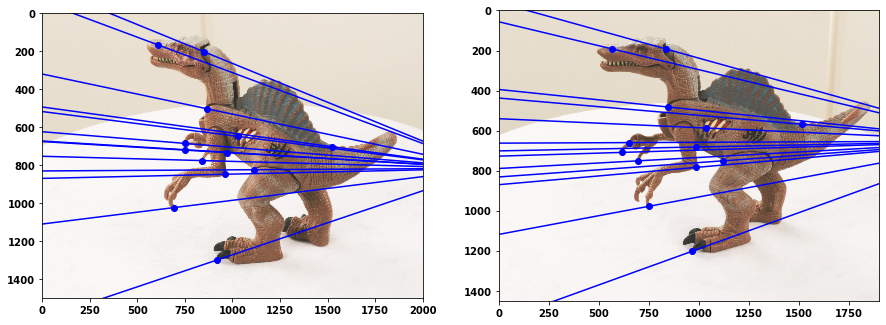

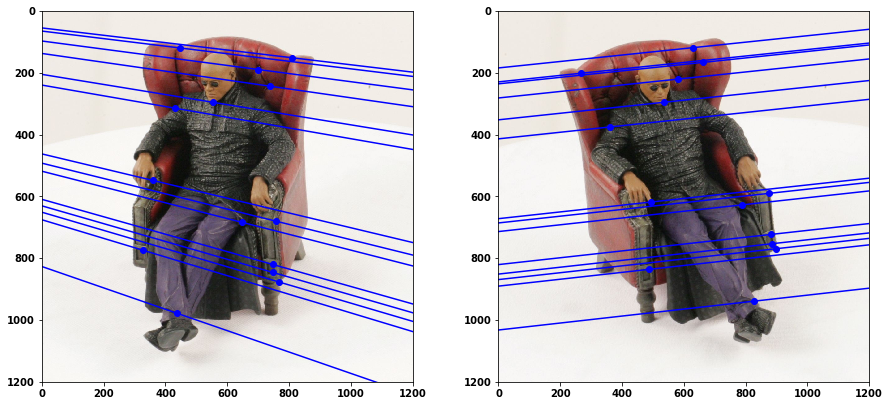

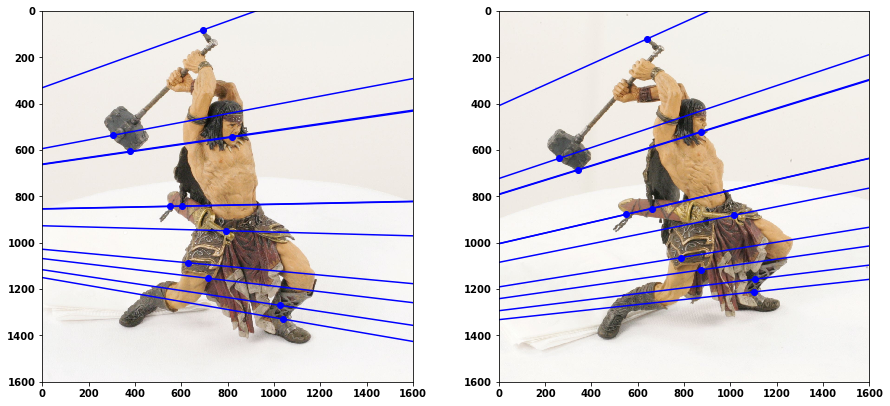

In [21]:
# replace images and corners with those of matrix and warrior
imgids = ["dino", "matrix", "warrior"]
for imgid in imgids:
    I1 = imageio.imread("./p4/"+imgid+"/"+imgid+"0.png")
    I2 = imageio.imread("./p4/"+imgid+"/"+imgid+"1.png")

    cor1 = np.load("./p4/"+imgid+"/cor1.npy")
    cor2 = np.load("./p4/"+imgid+"/cor2.npy")
    plot_epipolar_lines(I1,I2,cor1,cor2)

### Image Rectification [5 pts]
 An interesting case for epipolar geometry occurs when two images are parallel to each other. In this case, there is no rotation component involved between the two images and the essential matrix is $\texttt{E}=[\boldsymbol{T_{x}}]\boldsymbol{R}=[\boldsymbol{T_{x}}]$. Also if you observe the epipolar lines $\boldsymbol{l}$ and $\boldsymbol{l^{'}}$ for parallel images, they are horizontal and consequently, the corresponding epipolar lines share the same vertical coordinate. Therefore the process of making images parallel becomes useful while discerning the relationships between corresponding points in images.
 Rectifying a pair of images can also be done for uncalibrated camera images (i.e. we do not require the camera matrix of intrinsic parameters). Using the fundamental matrix we can find the pair of epipolar lines $\boldsymbol{l_i}$ and $\boldsymbol{l^{'}_i}$ for each of the correspondences. The intersection of these lines will give us the respective epipoles $\boldsymbol{e}$ and $\boldsymbol{e^{'}}$.  Now to make the epipolar lines to be parallel we need to map the epipoles to infinity. Hence , we need to find a homography that maps the epipoles to infinity. The method to find the homography has been implemented for you. You can read more about the method used to estimate the homography in the paper "Theory and Practice of Projective Rectification" by Richard Hartley.
 ![Image Rectification Setup](image_rectification.png)
 Using the compute_epipoles function from the previous part and the given compute_matching_homographies function, find the rectified images and plot the parallel epipolar lines using the plot_epipolar_lines function from above. You need to do this for both the matrix and the warrior images. A sample output will look as below:
 ![sample rectification](Sample_rectification.png)

In [97]:
def compute_matching_homographies(e2, F, im2, points1, points2):
    
    '''This function computes the homographies to get the rectified images
    input:
    e2--> epipole in image 2
    F--> the Fundamental matrix (Think about what you should be passing F or F.T!)
    im2--> image2
    points1 --> corner points in image1
    points2--> corresponding corner points in image2
    output:
    H1--> Homography for image 1
    H2--> Homography for image 2
    '''
    # calculate H2
    width = im2.shape[1]
    height = im2.shape[0]

    T = np.identity(3)
    T[0][2] = -1.0 * width / 2
    T[1][2] = -1.0 * height / 2
    e = T.dot(e2)
    e1_prime = e[0]
    e2_prime = e[1]
    if e1_prime >= 0:
        alpha = 1.0
    else:
        alpha = -1.0

    R = np.identity(3)
    R[0][0] = alpha * e1_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[0][1] = alpha * e2_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[1][0] = - alpha * e2_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[1][1] = alpha * e1_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    f = R.dot(e)[0]
    G = np.identity(3)
    G[2][0] = - 1.0 / f

    H2 = np.linalg.inv(T).dot(G.dot(R.dot(T)))

    # calculate H1
    e_prime = np.zeros((3, 3))
    e_prime[0][1] = -e2[2]
    e_prime[0][2] = e2[1]
    e_prime[1][0] = e2[2]
    e_prime[1][2] = -e2[0]
    e_prime[2][0] = -e2[1]
    e_prime[2][1] = e2[0]

    v = np.array([1, 1, 1])
    M = e_prime.dot(F) + np.outer(e2, v)
    
    points1_hat = H2.dot(M.dot(points1.T)).T
    points2_hat = H2.dot(points2.T).T
    
    W = points1_hat / points1_hat[:, 2].reshape(-1, 1)
    b = (points2_hat / points2_hat[:, 2].reshape(-1, 1))[:, 0]

    # least square problem
    a1, a2, a3 = np.linalg.lstsq(W, b, rcond=-1)[0]
    HA = np.identity(3)
    HA[0] = np.array([a1, a2, a3])

    H1 = HA.dot(H2).dot(M)
    return H1, H2

def to_homog(points):
    if points.ndim == 1:
        return np.append(points,1)
    else:
        return np.vstack((points, [1]*points.shape[1]))
    
def from_homog(points_homog):
    if points_homog.ndim == 1:
        return (points_homog/points_homog[-1])[:-1]
    else:
        return (points_homog/points_homog[-1,:])[:-1,:]    

def homography(im1,H1):
    rectified_im1 = np.zeros(im1.shape)
    for i in range(im1.shape[0]):
        width = np.arange(im1.shape[1])
        hight = np.ones(im1.shape[1])*i
        rectified_location = from_homog(np.linalg.inv(H1)@to_homog(np.vstack((width,hight)))).astype(int)    
        x = np.maximum(np.minimum(rectified_location[0,:],np.ones(hight.shape)*(im1.shape[1]-1)),np.zeros(hight.shape))
        y = np.maximum(np.minimum(rectified_location[1,:],np.ones(width.shape)*(im1.shape[0]-1)),np.zeros(width.shape))
        rectified_im1[hight.astype(int),width.astype(int)] = im1[y.astype(int),x.astype(int)]
    return rectified_im1.astype(int)

def image_rectification(im1,im2,points1,points2):
    '''this function provides the rectified images along with the new corner points as outputs for a given pair of 
    images with corner correspondences
    input:
    im1--> image1
    im2--> image2
    points1--> corner points in image1
    points2--> corner points in image2
    output:
    rectified_im1-->rectified image 1
    rectified_im2-->rectified image 2
    new_cor1--> new corners in the rectified image 1
    new_cor2--> new corners in the rectified image 2
    '''
    F = fundamental_matrix(points1,points2)
    e1,e2 = compute_epipole(F)
    H1,H2 = compute_matching_homographies(e2,F,im2,points1.T,points2.T)
#     print("H1e1 = {}".format((H1@e1).astype(int)))
#     print("H2e2 = {}".format((H2@e2).astype(int)))
    rectified_im1 = homography(im1,H1)
    rectified_im2 = homography(im2,H2)
    new_cor1 = from_homog(H1@points1).astype(int)
    new_cor2 = from_homog(H2@points2).astype(int)    
    return rgb2gray(rectified_im1),rgb2gray(rectified_im2),to_homog(new_cor1),to_homog(new_cor2)

Epipole mapping results for matrix:
H1e1 = [2526506       0       0]
H2e2 = [99084     0     0]


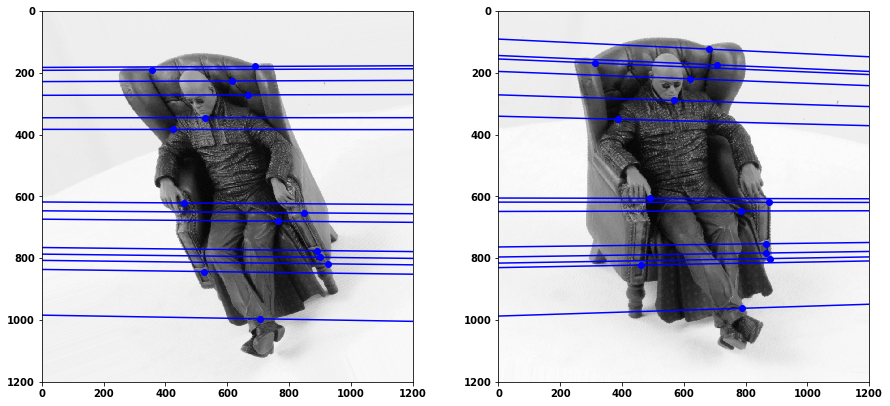

Epipole mapping results for warrior:
H1e1 = [91130     0     0]
H2e2 = [-3595     0     0]


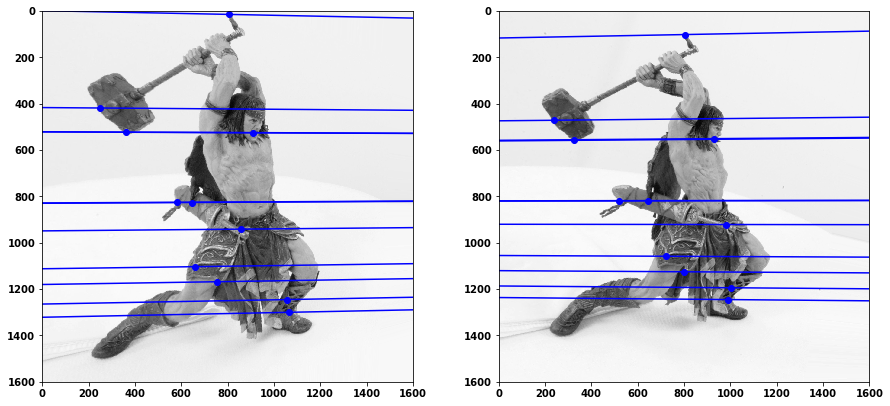

In [94]:
imgids = ["matrix", "warrior"]
for imgid in imgids:
    I1 = imageio.imread("./p4/"+imgid+"/"+imgid+"0.png")
    I2 = imageio.imread("./p4/"+imgid+"/"+imgid+"1.png")
    cor1 = np.load("./p4/"+imgid+"/cor1.npy")
    cor2 = np.load("./p4/"+imgid+"/cor2.npy")
    print("Epipole mapping results for "+imgid+":")
    rectified_im1,rectified_im2,new_cor1,new_cor2 = image_rectification(I1,I2,cor1,cor2)
    plot_epipolar_lines(rectified_im1,rectified_im2,new_cor1,new_cor2)

### Matching Using epipolar geometry[4 pts]

We will now use the epipolar geometry constraint on the rectified images and updated corner points to build a better matching algorithm. First, detect 10 corners
in Image1. Then, for each corner, do a linesearch along the corresponding parallel epipolar line in Image2.
Evaluate the NCC score for each point along this line and return the best match (or no match if all
scores are below the NCCth). R is the radius (size) of the NCC patch in the code below.  You do not
have to run this in both directions. Show your result as in the naive matching part. Execute this for the warrior and matrix images (**Total two outputs images**).

In [23]:
def display_correspondence(img1, img2, corrs):
    """Plot matching result on image pair given images and correspondences

    Args:
        img1: Image 1.
        img2: Image 2.
        corrs: Corner correspondence

    """
    show_matching_result(img1,img2,corrs)
    
def correspondence_matching_epipole(img1, img2, corners1, F, R, NCCth):
    """Find corner correspondence along epipolar line.

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Detected corners in image 1.
        F: Fundamental matrix calculated using given ground truth corner correspondences.
        R: NCC matching window radius.
        NCCth: NCC matching threshold.
    
    Returns:
        Matching result to be used in display_correspondence function

    """
    matching = []
    line = F.T@to_homog(corners1.T)
    for i in range(corners1.shape[0]):
        slope = -line[0,i]/line[1,i]
        y_intercept = -line[2,i]/line[1,i]      
        max_score = -1
        best_cor2 = []
        for j in range(R,img2.shape[1]-R):
            y = int(slope*j+y_intercept)
            if y>R and y<img2.shape[0]-R:
                cor2 = np.array([j,y])
                score = ncc_match(img1,img2,corners1[i],cor2,R)
                if score > max_score:
                    max_score = score
                    best_cor2 = cor2
        if max_score > NCCth:
            matching.append((corners1[i],best_cor2))
    return matching

In [114]:
I1 = imageio.imread("./p4/matrix/matrix0.png")
I2 = imageio.imread("./p4/matrix/matrix1.png")
cor1 = np.load("./p4/matrix/cor1.npy")
cor2 = np.load("./p4/matrix/cor2.npy")
I3 = imageio.imread("./p4/warrior/warrior0.png")
I4 = imageio.imread("./p4/warrior/warrior1.png")
cor3 = np.load("./p4/warrior/cor1.npy")
cor4 = np.load("./p4/warrior/cor2.npy")
nCorners = 10

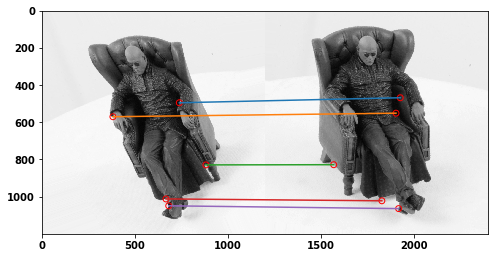

In [131]:
# For matrix
rectified_im1,rectified_im2,new_cor1,new_cor2 = image_rectification(I1,I2,cor1,cor2)
F_new = fundamental_matrix(new_cor1, new_cor2)
# Choose your threshold
NCCth = 0.65
#decide the NCC matching window radius
R = 15
# detect corners using corner detector here, store in corners1
smoothSTD = 1
windowSize = int(6*smoothSTD)
corners1 = corner_detect(rectified_im1, nCorners, smoothSTD, windowSize)
corrs = correspondence_matching_epipole(rectified_im1, rectified_im2, corners1, F_new, R, NCCth)
display_correspondence(rectified_im1, rectified_im2, corrs)

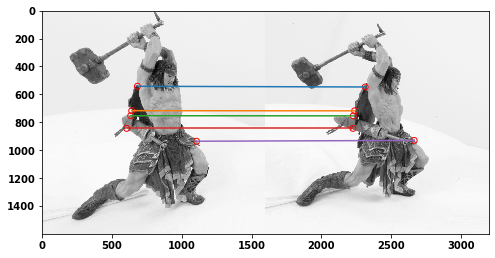

In [124]:
# For warrior
NCCth = 0.7
R = 20
smoothSTD = 2.5
windowSize = int(6*smoothSTD)
rectified_im3,rectified_im4,new_cor3,new_cor4 = image_rectification(I3,I4,cor3,cor4)
F_new2 = fundamental_matrix(new_cor3, new_cor4)
# You may wish to change your NCCth and R for warrior here.
corners2 = corner_detect(rectified_im3, nCorners, smoothSTD, windowSize)
corrs = correspondence_matching_epipole(rectified_im3, rectified_im4, corners2, F_new2, R, NCCth)
display_correspondence(rectified_im3, rectified_im4, corrs)